In [5]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math


In [11]:
# -*- coding: utf-8 -*-
dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda")
# Create random input and output data
start = time.time()
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

end = time.time()
print(f'time: {end-start}')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


99 1249.882290936981
199 882.9126488295159
299 624.6336405381389
399 442.7899040317316
499 314.72137723834845
599 224.49912127697147
699 160.9214108253351
799 116.10788604855698
899 84.51278336778742
999 62.23199028697722
1099 46.516214996597334
1199 35.42881641280057
1299 27.605211904141626
1399 22.083643269760493
1499 18.186093438530165
1599 15.434463583297822
1699 13.491551021731919
1799 12.119477389319918
1899 11.150399374453482
1999 10.465867488259704
time: 0.6553797721862793
Result: y = 0.04252688643662369 + 0.8510299435845028 x + -0.0073365955607624135 x^2 + -0.09251806331919882 x^3


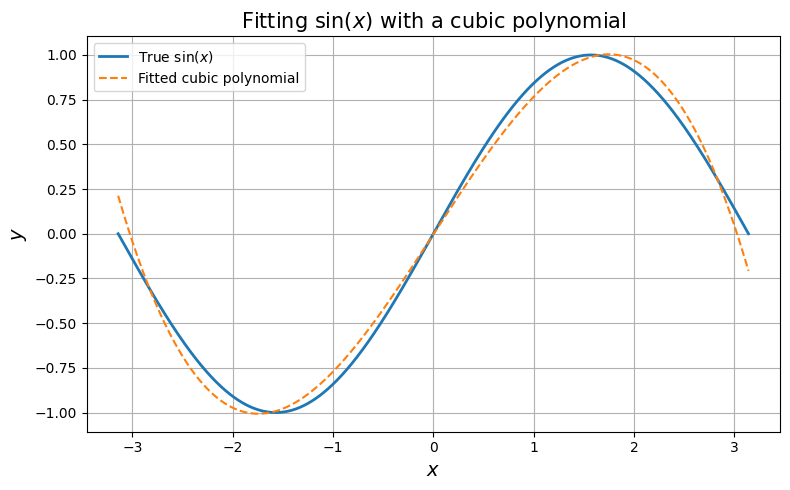

In [9]:
import matplotlib.pyplot as plt

# Compute the fitted curve using the final values of a, b, c, d
y_fit = a + b * x + c * x**2 + d * x**3

# Plot the true function and the fitted polynomial
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='True $\\sin(x)$', linewidth=2)
plt.plot(x, y_fit, label='Fitted cubic polynomial', linestyle='--')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Fitting $\\sin(x)$ with a cubic polynomial', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

